target= prediction of employee attrition
since its categorical output we will be doing classification model & AUC_ROC curve

In [114]:
import pandas as pd
df=pd.read_csv("employee_attrition.csv")

In [115]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [116]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [117]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

from above analysis we can understand their is no null values in the dataset

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [119]:
df.shape

(1470, 35)

In [120]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

EDA

In [121]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


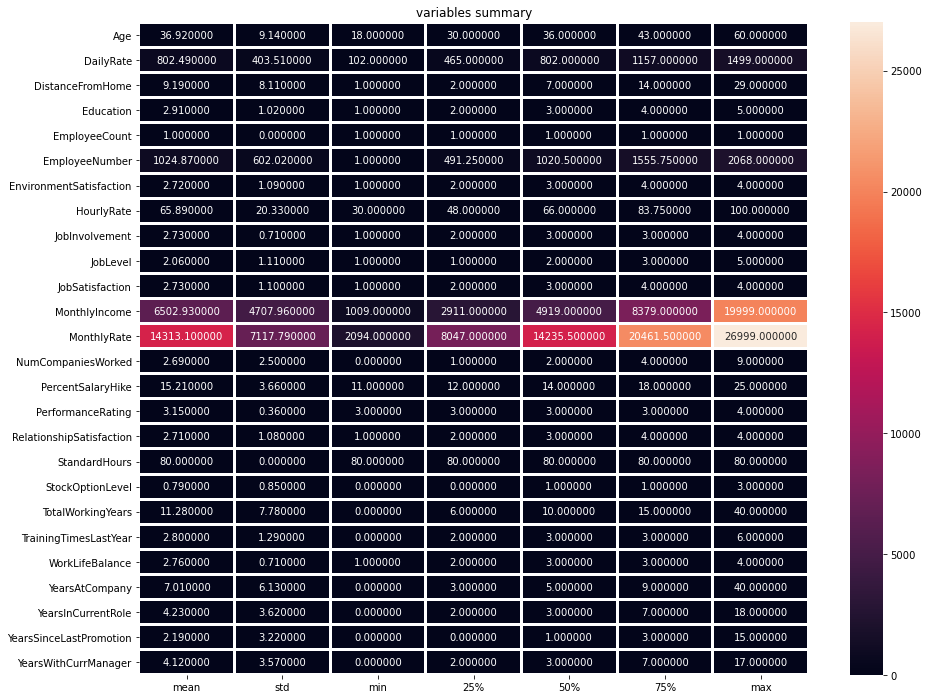

In [122]:
df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.title("variables summary")
plt.show()

When we observe the data distribution we can derive as follows
Mean & Median distribution has variance in DistanceFromHome,Employee number,monthly income,monthly rate & years at company have variations while all other columns are normally distributed

Mean and STD comparision we have variatopns in Work life balance,Total working years,standard hours,percent salary hike,age,hourly rate,daily rate,employee number ,monthly rate & years at company



In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

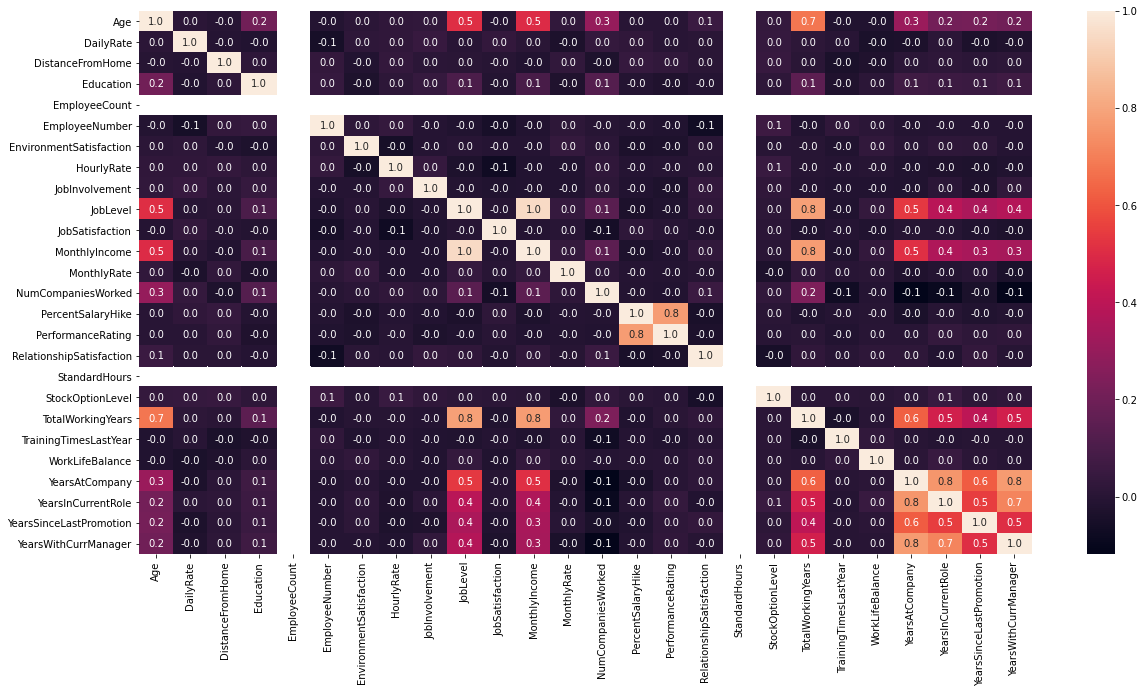

In [124]:


plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

we could observe employee count and standard hours have STD=0 hence we can have no impact of these columns with the other dataset and has no correlation with any other variables therefore can drop this data



DATA CLEANSING

In [125]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [126]:
df=df.drop(['EmployeeCount','StandardHours'], axis = 1)

In [127]:
df.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [128]:
df.select_dtypes(include=['int64']).dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [129]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [130]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

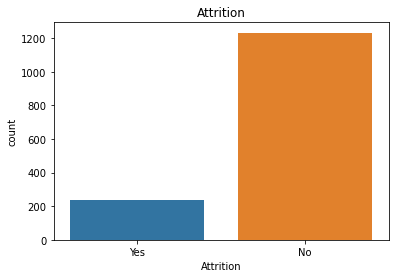

In [131]:
sns.countplot(df["Attrition"])
plt.title("Attrition")
plt.show()

In [132]:
df['Attrition']=df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

we can observe that oyr target column is str type and hence convert to binary for further analysis

In [133]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

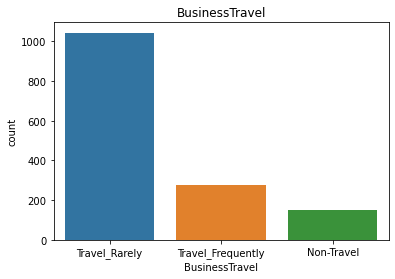

In [134]:
sns.countplot(df["BusinessTravel"])
plt.title("BusinessTravel")
plt.show()

In [135]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

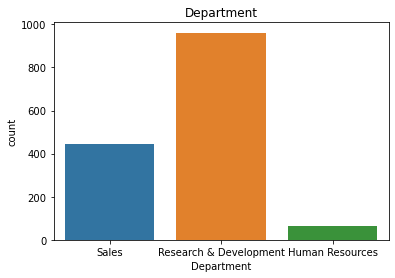

In [136]:
sns.countplot(df["Department"])
plt.title("Department")
plt.show()

In [137]:
df=pd.get_dummies(df)

we converted all categorical variables into numerical values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DCBC04580>,
      dtype=object)

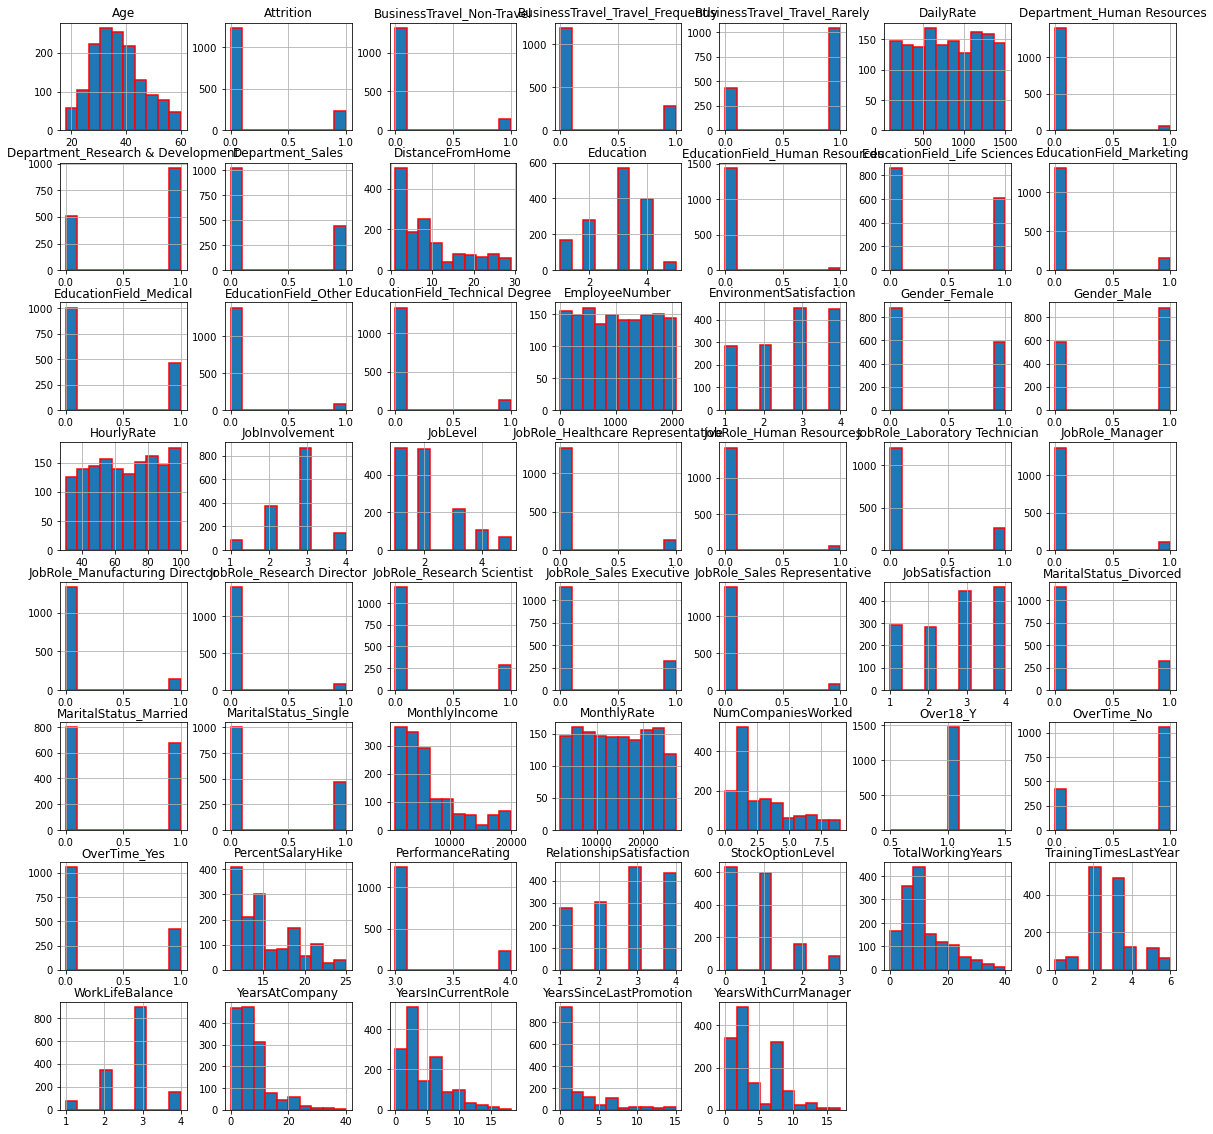

In [138]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [139]:
df.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceL

In [140]:
x = df.drop(['Attrition'], axis=1)
y=df['Attrition']

FINDING OUTLIERS

Age                                     AxesSubplot(0.125,0.816017;0.065678x0.0639831)
Attrition                            AxesSubplot(0.203814,0.816017;0.065678x0.0639831)
DailyRate                            AxesSubplot(0.282627,0.816017;0.065678x0.0639831)
DistanceFromHome                     AxesSubplot(0.361441,0.816017;0.065678x0.0639831)
Education                            AxesSubplot(0.440254,0.816017;0.065678x0.0639831)
EmployeeNumber                       AxesSubplot(0.519068,0.816017;0.065678x0.0639831)
EnvironmentSatisfaction              AxesSubplot(0.597881,0.816017;0.065678x0.0639831)
HourlyRate                           AxesSubplot(0.676695,0.816017;0.065678x0.0639831)
JobInvolvement                       AxesSubplot(0.755508,0.816017;0.065678x0.0639831)
JobLevel                             AxesSubplot(0.834322,0.816017;0.065678x0.0639831)
JobSatisfaction                         AxesSubplot(0.125,0.739237;0.065678x0.0639831)
MonthlyIncome                        AxesSu

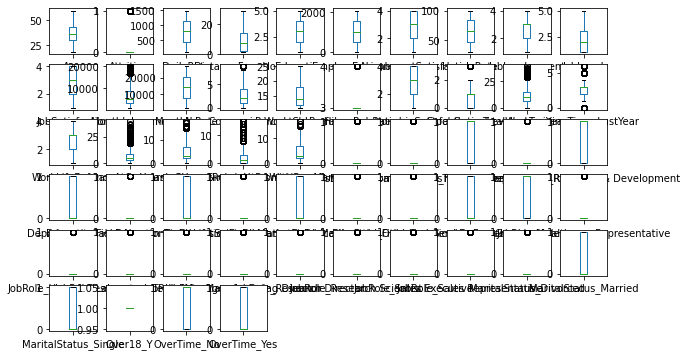

In [142]:
df.plot(kind='box',subplots= True,layout=(10,10),figsize=(10,10))

In [143]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [144]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)

In [145]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

DATA PROCESSING

In [146]:
#RESCALING

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [148]:
x=scale.fit_transform(x)

In [150]:
df.shape

(1470, 54)

CLASSIFICATION

In [151]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [163]:
#KNeighborsClassifier

In [164]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range (1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())


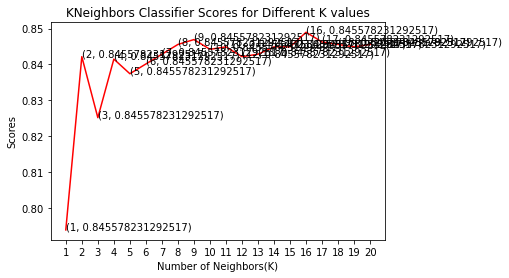

In [165]:
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range (1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[-1]))
    plt.xticks([i for i in range(1,21)])
    plt.xlabel('Number of Neighbors(K)')
    plt.ylabel('Scores')
    plt.title('KNeighbors Classifier Scores for Different K values')


In [166]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [167]:
score.mean()

0.8421768707482993

In [43]:
#DecisionTreeClassifier

In [44]:
dt_scores=[]
for d in range(1,21):
    dt_classifier=DecisionTreeClassifier()
    score=cross_val_score(dt_classifier,x,y,cv=10)
    dt_scores.append(score.mean())

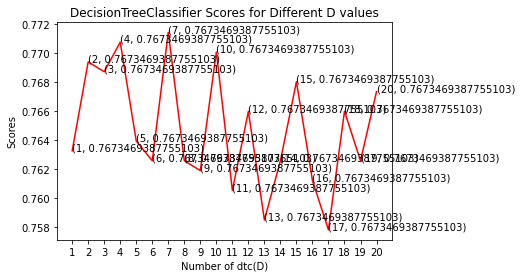

In [45]:
plt.plot([d for d in range(1,21)],dt_scores,color='red')
for d in range (1,21):
    plt.text(d,dt_scores[d-1],(d,dt_scores[-1]))
    plt.xticks([d for d in range(1,21)])
    plt.xlabel('Number of dtc(D)')
    plt.ylabel('Scores')
    plt.title('DecisionTreeClassifier Scores for Different D values')

In [46]:
dt_classifier=DecisionTreeClassifier()
score=cross_val_score(dt_classifier,x,y,cv=10)

In [47]:
score.mean()

0.7653061224489797

In [48]:
#LogisticRegression

In [157]:
lr_scores=[]
for l in range(1,21):
    lr_classifier=LogisticRegression()
    score=cross_val_score(lr_classifier,x,y,cv=10)
    lr_scores.append(score.mean())

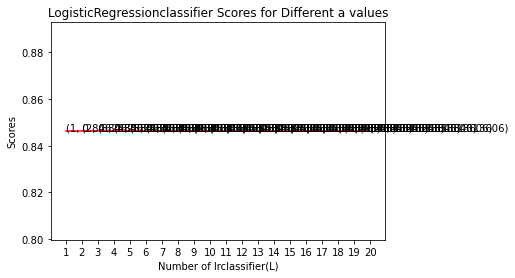

In [158]:
plt.plot([l for l in range(1,21)],lr_scores,color='red')
for l in range (1,21):
    plt.text(l,lr_scores[l-1],(l,lr_scores[-1]))
    plt.xticks([l for l in range(1,21)])
    plt.xlabel('Number of lrclassifier(L)')
    plt.ylabel('Scores')
    plt.title('LogisticRegressionclassifier Scores for Different a values')

In [159]:
lr_classifier=LogisticRegression()
score=cross_val_score(lr_classifier,x,y,cv=10)

In [160]:
score.mean()

0.8462585034013606

In [59]:
#GaussianNB

In [60]:
gnb_scores=[]
for g in range(1,21):
    gnb_classifier=GaussianNB()
    score=cross_val_score(gnb_classifier,x,y,cv=10)
    gnb_scores.append(score.mean())

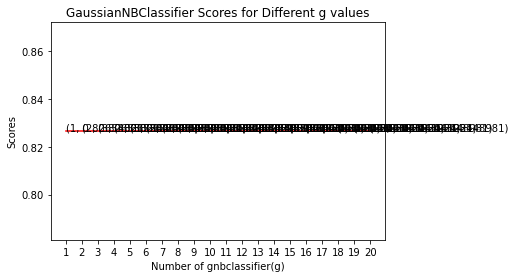

In [61]:
plt.plot([g for g in range(1,21)],gnb_scores,color='red')
for g in range (1,21):
    plt.text(g,gnb_scores[g-1],(g,gnb_scores[-1]))
    plt.xticks([g for g in range(1,21)])
    plt.xlabel('Number of gnbclassifier(g)')
    plt.ylabel('Scores')
    plt.title('GaussianNBClassifier Scores for Different g values')

In [62]:
gnb_classifier=GaussianNB()
score=cross_val_score(gnb_classifier,x,y,cv=10)

In [63]:
score.mean()

0.8265306122448981

In [64]:
#SVC

In [65]:
svc_scores=[]
for s in range(1,21):
    svc_classifier=SVC()
    score=cross_val_score(svc_classifier,x,y,cv=10)
    svc_scores.append(score.mean())

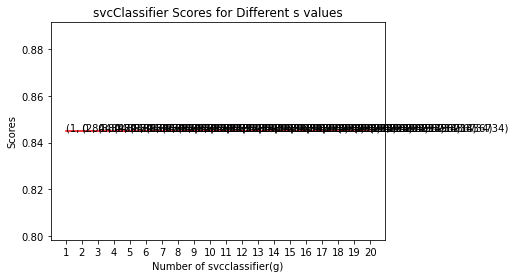

In [66]:
plt.plot([s for s in range(1,21)],svc_scores,color='red')
for s in range (1,21):
    plt.text(s,svc_scores[s-1],(s,svc_scores[-1]))
    plt.xticks([s for s in range(1,21)])
    plt.xlabel('Number of svcclassifier(g)')
    plt.ylabel('Scores')
    plt.title('svcClassifier Scores for Different s values')

In [67]:
svc_classifier=SVC()
score=cross_val_score(svc_classifier,x,y,cv=10)

In [68]:
score.mean()

0.8448979591836734

In [69]:
#AdaBoostClassifier

In [70]:
adb_scores=[]
for ad in range(1,21):
    adb_classifier=AdaBoostClassifier()
    score=cross_val_score(adb_classifier,x,y,cv=10)
    adb_scores.append(score.mean())

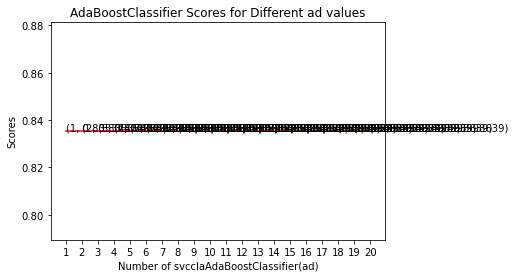

In [71]:
plt.plot([ad for ad in range(1,21)],adb_scores,color='red')
for ad in range (1,21):
    plt.text(ad,adb_scores[ad-1],(ad,adb_scores[-1]))
    plt.xticks([ad for ad in range(1,21)])
    plt.xlabel('Number of svcclaAdaBoostClassifier(ad)')
    plt.ylabel('Scores')
    plt.title('AdaBoostClassifier Scores for Different ad values')

In [72]:
adb_classifier=SVC()
score=cross_val_score(adb_classifier,x,y,cv=10)

In [73]:
score.mean()

0.8448979591836734

In [74]:
#GradientBoostingClassifier

In [75]:
gbr_scores=[]
for gbr in range(1,21):
    gbr_classifier=GradientBoostingClassifier()
    score=cross_val_score(gbr_classifier,x,y,cv=10)
    gbr_scores.append(score.mean())

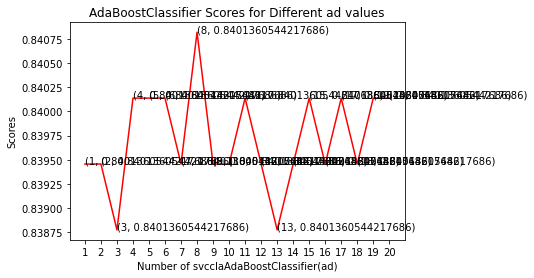

In [76]:
plt.plot([gbr for gbr in range(1,21)],gbr_scores,color='red')
for gbr in range (1,21):
    plt.text(gbr,gbr_scores[gbr-1],(gbr,gbr_scores[-1]))
    plt.xticks([gbr for gbr in range(1,21)])
    plt.xlabel('Number of svcclaAdaBoostClassifier(ad)')
    plt.ylabel('Scores')
    plt.title('AdaBoostClassifier Scores for Different ad values')

In [77]:
gbr_classifier=GradientBoostingClassifier()
score=cross_val_score(gbr_classifier,x,y,cv=10)

In [78]:
score.mean()

0.8394557823129253

AUC_ROC

In [169]:
from sklearn.metrics import roc_curve, auc
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.8673469387755102


In [170]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.23750003, 0.04487801, 0.28527525, 0.07197864, 0.08122971,
       0.36883096, 0.20368228, 0.04398229, 0.09669227, 0.12952327,
       0.60802692, 0.06891189, 0.13679342, 0.16026874, 0.30526602,
       0.19609537, 0.53029531, 0.04180976, 0.09213697, 0.01968476,
       0.23087624, 0.02776446, 0.11277063, 0.24296366, 0.09095545,
       0.01020186, 0.26008607, 0.05887821, 0.21387349, 0.02758069,
       0.0495124 , 0.05738299, 0.04137464, 0.09903394, 0.22421209,
       0.06141263, 0.03440744, 0.12053659, 0.50739392, 0.06682225,
       0.15248488, 0.09250704, 0.0728723 , 0.11274406, 0.76827462,
       0.09868284, 0.61304226, 0.27027602, 0.30647279, 0.5586828 ,
       0.03136594, 0.28143225, 0.01197025, 0.13440869, 0.06039839,
       0.49878666, 0.15965175, 0.04007644, 0.11653343, 0.1149268 ,
       0.06623339, 0.19338737, 0.06902393, 0.02752282, 0.05886577,
       0.28574262, 0.0602019 , 0.19243432, 0.20293951, 0.21618622,
       0.11143144, 0.10675559, 0.35356112, 0.16249731, 0.21091

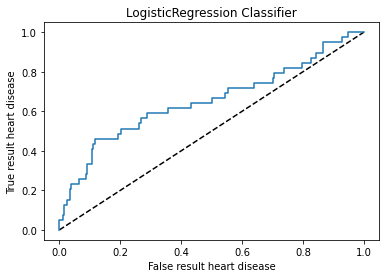

0.5651583710407239

In [171]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression()')
plt.xlabel('False result heart disease')
plt.ylabel('True result heart disease')
plt.title('LogisticRegression Classifier')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

THE BEST MODEL IS LogisticRegressionClassifier
the maximum accuracy inthis model is 56%,we can derive more accuracy with higher data

SERIALIZATION

In [172]:
import pickle
filename='inhouse_employee_attrition.csv.pkl'

In [173]:
pickle.dump(lr,open(filename,'wb'))

In [174]:
#CONCLUSION

In [175]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))

In [176]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [177]:
df_final

,original,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
289,0,0
290,0,0
291,0,0
292,0,0


From the above table the model is predicted the values with 50-56% accuracy